# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [4]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [6]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [8]:
# Add model training in here!
model = RandomForestClassifier() # Add parameters to the model!
model.fit(X_train, y_train) # Complete this method call!

RandomForestClassifier()

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [9]:
# Generate predictions here!
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


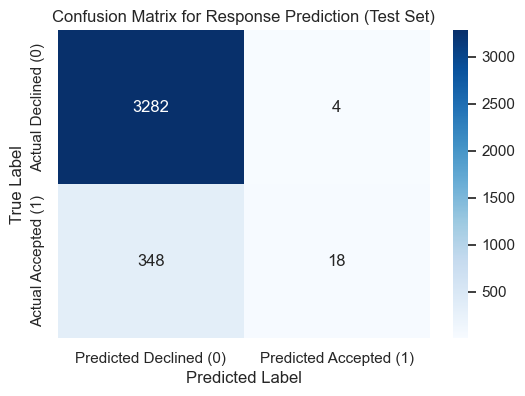

In [10]:
# Calculate performance metrics here
cm = confusion_matrix(y_test, y_pred)

#for better visualization, let's use seaborn's heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Declined (0)', 'Predicted Accepted (1)'],
            yticklabels=['Actual Declined (0)', 'Actual Accepted (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Response Prediction (Test Set)')
plt.show()

In [11]:
#calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9036
Precision: 0.8182
Recall: 0.0492
F1 Score: 0.0928


In [12]:

#print results and interpretation
print(f"Model Accuracy on Test Set: {accuracy:.4f}")
print(f"Interpretation: The model correctly classified {accuracy:.2%} of the churn in the test set.")
print("This indicates a very high overall performance in distinguishing a Churn or not for the company.")

print(f"\nModel Precision on Test Set: {precision:.4f}")
print(f"Interpretation: When the model predicts a churn (Response=1), it is correct {precision:.2%} of the time.")
print("High precision is important if the cost of incorrectly flagging churn (FP) is high.")

#print results and interpretation
print(f"\nModel Recall on Test Set: {recall:.4f}")
print(f"Interpretation: The model identified {recall:.2%} of all the true churn in the test set.")
print("High recall is crucial if the cost of missing a negative churn (FN) is very high.")
print('\nThis model has a low recall score, leading to negative churns being wrongfully shown as churns (FN).')

#print results and Interpretation
print(f"\nModel F1-Score on Test Set: {f1:.4f}\n")
print(f"Interpretation: The F1-Score of {f1:.4f} is low. The model is flawed in finding actual churn (TP).")

Model Accuracy on Test Set: 0.9036
Interpretation: The model correctly classified 90.36% of the churn in the test set.
This indicates a very high overall performance in distinguishing a Churn or not for the company.

Model Precision on Test Set: 0.8182
Interpretation: When the model predicts a churn (Response=1), it is correct 81.82% of the time.
High precision is important if the cost of incorrectly flagging churn (FP) is high.

Model Recall on Test Set: 0.0492
Interpretation: The model identified 4.92% of all the true churn in the test set.
High recall is crucial if the cost of missing a negative churn (FN) is very high.

This model has a low recall score, leading to negative churns being wrongfully shown as churns (FN).

Model F1-Score on Test Set: 0.0928

Interpretation: The F1-Score of 0.0928 is low. The model is flawed in finding actual churn (TP).


                                          Coefficient
cons_12m                                     0.051788
net_margin                                   0.049529
forecast_meter_rent_12m                      0.048302
margin_net_pow_ele                           0.047085
margin_gross_pow_ele                         0.046963
...                                               ...
channel_ewpakwlliwisiwduibdlfmalxowmwpci     0.002676
var_6m_price_mid_peak_fix                    0.002134
var_6m_price_peak_fix                        0.002060
peak_mid_peak_fix_max_monthly_diff           0.000982
forecast_discount_energy                     0.000962

[61 rows x 1 columns]
Top 5 Features:
                         Coefficient
cons_12m                    0.051788
net_margin                  0.049529
forecast_meter_rent_12m     0.048302
margin_net_pow_ele          0.047085
margin_gross_pow_ele        0.046963


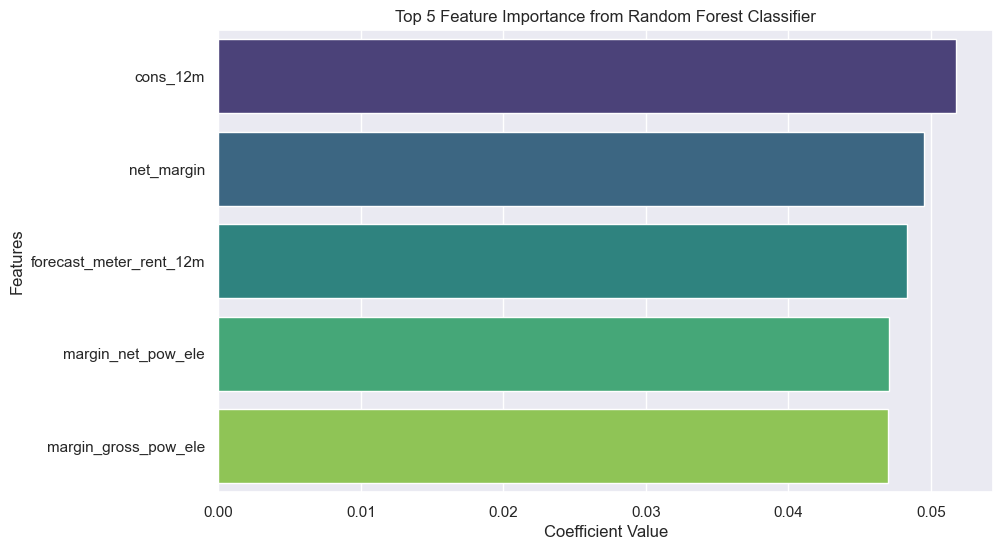

In [18]:
# model coefficients - odds ratios

df_coefficients = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Coefficient'])
df_coefficients = df_coefficients.sort_values(by='Coefficient', ascending=False)

print(df_coefficients)

#display top 5 features
print("Top 5 Features:")
print(df_coefficients.head())


# Plotting the coefficients
plt.figure(figsize=(10, 6)) 
sns.barplot(x=df_coefficients['Coefficient'].head(), y=df_coefficients.head().index, palette='viridis')
plt.title('Top 5 Feature Importance from Random Forest Classifier')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

### Why did we choose these metrics?

When evaluating the performance of a classification model, it is important to consider multiple metrics to get a comprehensive understanding of the model's behavior. Here is why we chose the following metrics:

1. **Accuracy**:
    - Accuracy measures the proportion of correctly classified instances out of the total instances.
    - It is a good metric when the dataset is balanced, as it provides an overall measure of the model's performance.
    - However, in cases of imbalanced datasets, accuracy alone can be misleading, as it may be high even if the model fails to correctly classify the minority class.

2. **Precision**:
    - Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
    - It is particularly important when the cost of false positives is high. For example, in this case, if the model incorrectly predicts churn (false positive), it could lead to unnecessary retention efforts and costs.

3. **Recall**:
    - Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset.
    - It is crucial when the cost of false negatives is high. For example, missing actual churn cases (false negatives) could result in losing valuable customers.

4. **F1-Score**:
    - The F1-Score is the harmonic mean of precision and recall, providing a single metric that balances the trade-off between the two.
    - It is particularly useful when the dataset is imbalanced, as it considers both false positives and false negatives.

5. **Confusion Matrix**:
    - The confusion matrix provides a detailed breakdown of the model's predictions, showing true positives, true negatives, false positives, and false negatives.
    - It helps in understanding the types of errors the model is making and provides insights into areas for improvement.

By using these metrics together, we can evaluate the model's performance comprehensively and make informed decisions about its effectiveness in predicting customer churn.

### Do we find the model satisfactory?

The model is not satisfactory due to the following reasons:

1. **Low F1-Score (0.0827)**:
    - The F1-Score is the harmonic mean of precision and recall, balancing the trade-off between the two. A low F1-Score indicates that the model struggles to balance precision and recall effectively, leading to poor overall performance.

2. **Low Recall (0.0437)**:
    - Recall measures the proportion of actual positive cases (churn) that the model correctly identifies. A low recall means the model is missing a significant number of actual churn cases (false negatives), which is critical in churn prediction, as failing to identify churners can result in losing valuable customers.

3. **High Precision (0.7619)**:
    - While the precision is relatively high, it is not sufficient to compensate for the low recall. High precision indicates that when the model predicts churn, it is often correct, but this is overshadowed by its inability to identify most churn cases.

4. **Imbalanced Dataset**:
    - The confusion matrix shows a significant imbalance between the classes (e.g., many more non-churn cases than churn cases). This imbalance likely contributes to the model's poor recall and F1-Score, as the model may be biased toward predicting the majority class (non-churn).

### Conclusion:
The model is not satisfactory for churn prediction, as it fails to identify most churn cases (low recall) and has poor overall performance (low F1-Score). Improvements are needed, such as addressing class imbalance (e.g., oversampling, undersampling, or using class weights) and tuning the model's hyperparameters.

In [14]:
feature_cols = model.feature_names_in_

df['predictions'] = model.predict(df[feature_cols])
df['predictions'] = df['predictions'].replace({0: 'Not Churn', 1: 'Will Churn'})

print(df)

churn_rate = df['predictions'].value_counts(normalize=True).get('Will Churn', 0) * 100
print(f"Churn Rate: {churn_rate:.2f}%")

                                     id  cons_12m  cons_gas_12m  \
0      24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944   
1      d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000   
2      764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000   
3      bba03439a292a1e166f80264c16191cb  3.200029      0.000000   
4      149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000   
...                                 ...       ...           ...   
14601  18463073fb097fc0ac5d3e040f356987  4.508812      4.680707   
14602  d0a6f71671571ed83b2645d23af6de00  3.858778      0.000000   
14603  10e6828ddd62cbcf687cb74928c4c2d2  3.265996      0.000000   
14604  1cf20fd6206d7678d5bcafd28c53b4db  2.120574      0.000000   
14605  563dde550fd624d7352f3de77c0cdfcd  3.941064      0.000000   

       cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0             0.000000           0.000000                       0.0   
1             0.000000           2.280920            